In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../../../data/input/test.csv')

In [3]:
feature = data.drop('LUNG_CANCER', axis='columns')
label = data['LUNG_CANCER']

In [4]:
# Load trained model
model = joblib.load('../../../models/gradient_boosting.joblib')

pred = model.predict(feature)

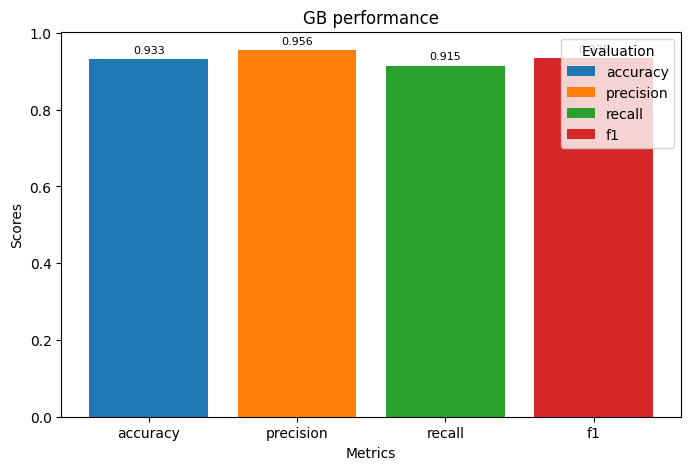

In [5]:
# Display model performace
metrics = ['accuracy', 'precision', 'recall', 'f1']
scores = [accuracy_score(label, pred), precision_score(label, pred), recall_score(label, pred), f1_score(label, pred)]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, scores, color=colors, label=metrics)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f'{height:.3f}', ha='center', va='bottom', fontsize=8)

plt.xlabel('Metrics') 
plt.ylabel('Scores') 
plt.title('GB performance') 
plt.legend(title='Evaluation') 

plt.savefig('../../../figures/model/gb_metrics.png')
plt.show() 

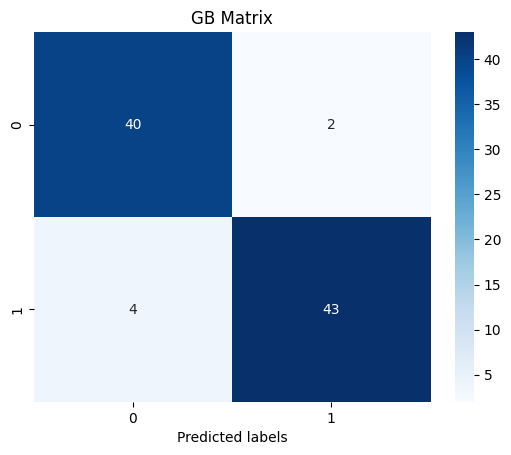

In [6]:
# Display class distributions
matrix = confusion_matrix(label, pred)

sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.title('GB Matrix')

plt.savefig('../../../figures/model/gb_matrix.png')
plt.show()

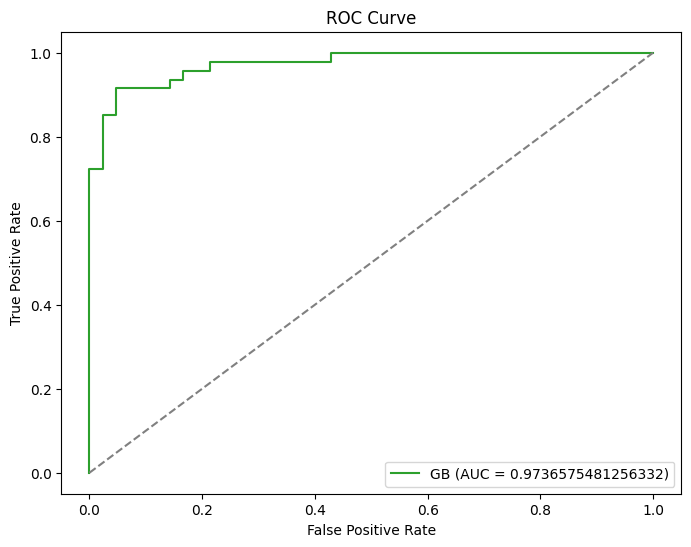

In [7]:
# Display True positive rates
probs = model.predict_proba(feature)[:, 1] 

roc_auc = roc_auc_score(label, probs)
fpr, tpr, _ = roc_curve(label, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'GB (AUC = {roc_auc})', color='#2ca02c')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.savefig('../../../figures/model/gb_roc_auc.png')
plt.show()

In [8]:
# Display class reports
print(classification_report(label, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        42
           1       0.96      0.91      0.93        47

    accuracy                           0.93        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.93      0.93      0.93        89

